In [1]:
# standard libraries
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import multivariate_normal, norm
from scipy import linalg, stats
from particles import resampling as rs
import time
import importlib
import sys
sys.path.append('..')

In [2]:
mmd_ula = np.loadtxt("mmd_ula.txt")
mmd_mala = np.loadtxt("mmd_mala.txt")
mmd_fr = np.loadtxt("mmd_fr.txt")
mmd_wfr = np.loadtxt("mmd_wfr.txt")
mmd_smcula = np.loadtxt("mmd_smcula.txt")
mmd_smcmala = np.loadtxt("mmd_smcmala.txt")

In [3]:
w1_ula = np.loadtxt("w1_ula.txt")
w1_mala = np.loadtxt("w1_mala.txt")
w1_fr = np.loadtxt("w1_fr.txt")
w1_wfr = np.loadtxt("w1_wfr.txt")
w1_smcula = np.loadtxt("w1_smcula.txt")
w1_smcmala = np.loadtxt("w1_smcmala.txt")

In [4]:
Niter = 1000
Niter_ula = int(Niter*18)
Niter_mala = int(Niter*4.5)
Niter_fr = int(Niter*7)
Niter_smcula = int(Niter*13)
Niter_smcmala = int(Niter*3.7)

In [5]:
avg_runtime = np.loadtxt("times.txt")

In [6]:
xx_ula = avg_runtime[0]/Niter_ula*np.arange(Niter_ula)
xx_mala = avg_runtime[1]/Niter_mala*np.arange(Niter_mala)
xx_fr = avg_runtime[2]/Niter_fr*np.arange(Niter_fr)
xx_wfr = avg_runtime[3]/Niter*np.arange(Niter)
xx_smcula = avg_runtime[4]/Niter_smcula*np.arange(Niter_smcula)
xx_smcmala = avg_runtime[5]/Niter_smcmala*np.arange(Niter_smcmala)

In [7]:
w1_ula_plot = np.mean(w1_ula, axis = 0)
w1_mala_plot = np.mean(w1_mala, axis = 0)
w1_fr_plot = np.mean(w1_fr, axis = 0)
w1_wfr_plot = np.mean(w1_wfr, axis = 0)
w1_smcula_plot = np.mean(w1_smcula, axis = 0)
w1_smcmala_plot = np.mean(w1_smcmala, axis = 0)

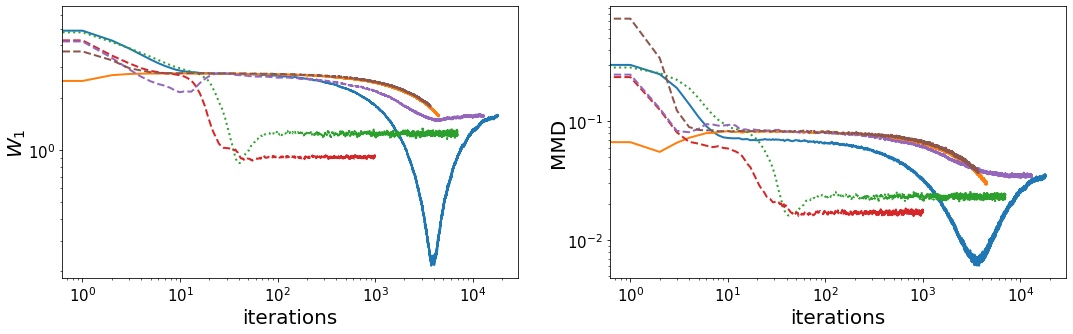

In [8]:
plt.figure(figsize = (18,5))
plt.subplot(1, 2, 1)
plt.loglog(w1_ula_plot, label = 'ULA', lw = 2)
plt.plot(w1_mala_plot, label = 'MALA', lw = 2)
plt.plot(w1_fr_plot, label = 'SMC-tempering', lw = 2, linestyle = 'dotted')
plt.plot(w1_wfr_plot, label = 'SMC-WFR', lw = 2, linestyle = 'dashed')
plt.plot(w1_smcula_plot, label = 'SMC-ULA', lw = 2, linestyle = 'dashed')
plt.plot(w1_smcmala_plot, label = 'SMC-MALA', lw = 2, linestyle = 'dashed')
plt.xlabel('iterations', fontsize = 20)
plt.ylabel('$W_1$', fontsize = 20, labelpad=-1)
plt.xticks(fontsize=15);
plt.yticks(fontsize=15);
# legend = plt.legend(loc = 'lower center', bbox_to_anchor=(1, -0.5), ncol = 6, fontsize = 20)
plt.subplot(1, 2, 2)
plt.loglog(np.mean(mmd_ula, axis = 0), lw = 2)
plt.plot(np.mean(mmd_mala, axis = 0), lw = 2)
plt.plot(np.mean(mmd_fr, axis = 0), lw = 2, linestyle = 'dotted')
plt.plot(np.mean(mmd_wfr, axis = 0), lw = 2, linestyle = 'dashed')
plt.plot(np.mean(mmd_smcula, axis = 0), lw = 2, linestyle = 'dashed')
plt.plot(np.mean(mmd_smcmala, axis = 0), lw = 2, linestyle = 'dashed')
plt.xlabel('iterations', fontsize = 20)
plt.ylabel('MMD', fontsize = 20, labelpad=-1)
plt.xticks(fontsize=15);
plt.yticks(fontsize=15);
# plt.savefig('conv_iter_gm.pdf', bbox_inches="tight")

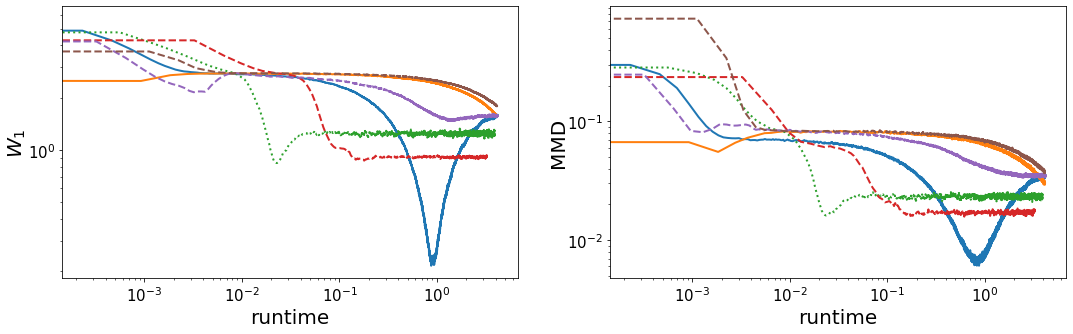

In [9]:
plt.figure(figsize = (18,5))
plt.subplot(1, 2, 1)
plt.loglog(xx_ula, w1_ula_plot, label = 'ULA', lw = 2)
plt.plot(xx_mala, w1_mala_plot, label = 'MALA', lw = 2)
plt.plot(xx_fr, w1_fr_plot, label = 'SMC-tempering', lw = 2, linestyle = 'dotted')
plt.plot(xx_wfr, w1_wfr_plot, label = 'SMC-WFR', lw = 2, linestyle = 'dashed')
plt.plot(xx_smcula, w1_smcula_plot, label = 'SMC-ULA', lw = 2, linestyle = 'dashed')
plt.plot(xx_smcmala, w1_smcmala_plot, label = 'SMC-MALA', lw = 2, linestyle = 'dashed')
plt.xlabel('runtime', fontsize = 20)
plt.ylabel('$W_1$', fontsize = 20, labelpad=-1)
plt.xticks(fontsize=15);
plt.yticks(fontsize=15);
plt.subplot(1, 2, 2)
plt.loglog(xx_ula, np.mean(mmd_ula, axis = 0), lw = 2)
plt.plot(xx_mala, np.mean(mmd_mala, axis = 0), lw = 2)
plt.plot(xx_fr, np.mean(mmd_fr, axis = 0), lw = 2, linestyle = 'dotted')
plt.plot(xx_wfr, np.mean(mmd_wfr, axis = 0), lw = 2, linestyle = 'dashed')
plt.plot(xx_smcula, np.mean(mmd_smcula, axis = 0), lw = 2, linestyle = 'dashed')
plt.plot(xx_smcmala, np.mean(mmd_smcmala, axis = 0), lw = 2, linestyle = 'dashed')
plt.xlabel('runtime', fontsize = 20)
plt.ylabel('MMD', fontsize = 20, labelpad=-1)
plt.xticks(fontsize=15);
plt.yticks(fontsize=15);
# plt.savefig('conv_runtime_gm.pdf', bbox_inches="tight")